<a href="https://colab.research.google.com/github/sandhc1/GUVI_DS/blob/main/Practice/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import statistics as s
import pandas as pd
import statistics as s
data = [1,2,3,4,5,6,3,5,3]
print("mean----->",np.mean(data))
print("median----->",np.median(data))
print("min----->",np.min(data))
print("max----->",np.max(data))
print("varience----->",np.var(data))
print("standard deviation----->",np.std(data))
print("average----->",np.average(data))
print("mode----->",s.mode(data))

mean-----> 3.5555555555555554
median-----> 3.0
min-----> 1
max-----> 6
varience-----> 2.2469135802469133
standard deviation-----> 1.4989708403591155
average-----> 3.5555555555555554
mode-----> 3


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(np.mean(data["Age"]))
print(np.median(data["Age"]))
print(s.mode(data["Age"]))
print(np.min(data['Age']))
print(np.max(data['Age']))

33.240885416666664
29.0
22
21
81


right skewness

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(np.std(data["Pregnancies"]))
print(np.std(data["Age"]))

3.3673836124089958
11.752572645994181


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
d = df["total_litres_of_pure_alcohol"]
print(np.mean(d))
print(np.median(d))
print(s.mode(d))
print(np.average(d))
print(np.var(d))
print(np.std(d))
print(np.max(d))
print(np.min(d))
print("range:",np.max(d)-np.min(d))

4.717098445595855
4.2
0.0
4.717098445595855
14.164008161292921
3.7635100851854935
14.4
0.0
range: 14.4


**OUTLIERS**

In [ ]:
first_quartile = df["spirit_servings"].quantile(.25)
third_quartile = df["spirit_servings"].quantile(.75)
IQR = third_quartile - first_quartile
print(IQR)

124.0


In [ ]:
print("upperlimit",third_quartile+1.5*IQR)
print("lowerlimit",first_quartile-1.5*IQR)

upperlimit 314.0
lowerlimit -182.0


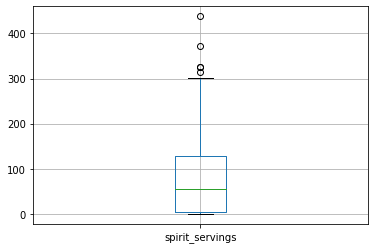

In [ ]:
df.boxplot("spirit_servings")

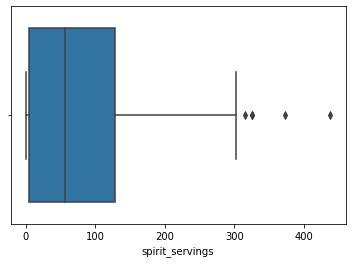

In [ ]:
import seaborn as sns
sns.boxplot(x = df["spirit_servings"])

**Z SCORE**

In [ ]:
from scipy import stats
print(d) 
print ("Z-score for array :", stats.zscore(df["spirit_servings"], axis = 0))
print ("Z-score for array : ", stats.zscore(df["spirit_servings"], axis = 1))


0       0.0
1       4.9
2       0.7
3      12.4
4       5.9
       ... 
188     7.7
189     2.0
190     0.1
191     2.5
192     4.7
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64
Z-score for array : 0     -0.919818
1      0.579240
2     -0.919818
3      0.647379
4     -0.272497
         ...   
188    0.215832
189   -0.897105
190   -0.919818
191   -0.704044
192   -0.715401
Name: spirit_servings, Length: 193, dtype: float64


AxisError: ignored

In [ ]:
print(np.nanmean(d))
print(np.nanstd(d))
print(np.nanvar(d))

4.717098445595855
3.7635100851854935
14.164008161292921


**Z Test**

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats

data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
       105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

# print(ztest(data,H0-null hypothesis))
print(ztest(data,value=105))

# (svalue,p-value)
# if p-value < 0.05 then reject null hypothesis
# if p-value > 0.05 then failed to reject null hypothesis 

(-1.0214317714078065, 0.30704991907387524)


**T-Test**

In [ ]:
print(stats.ttest_1samp(data,popmean=105))

Ttest_1sampResult(statistic=-1.0214317714078065, pvalue=0.3198803195380059)


In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv")


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(ztest(data['Pregnancies'],value=8))

# reject the null hypothesis
# strong evidence that mean is not 8

(-34.172021591118785, 6.2978032112544e-256)


In [ ]:
import numpy as np
np.mean(data['Pregnancies'])

3.8450520833333335

In [ ]:
print(stats.ttest_1samp(data['Pregnancies'],popmean=4))

Ttest_1sampResult(statistic=-1.2743561796750649, pvalue=0.20292317503312896)


**Two Sample Z-Test in Python**
Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.

The following code shows how to perform a two sample z-test in Python to determine if the mean IQ level is different between the two cities:


In [ ]:
# z-test 2 sample
from statsmodels.stats.weightstats import ztest as ztest


#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(cityA, cityB, value=0) 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-1.9953236073282115, 0.046007596761332065)

here value of H0 is 0 because null hypothesis is that there is no difference in IQ of two cities

Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities


In [ ]:
# t-test 2 sample 

import scipy.stats as stats

stats.ttest_ind(a=cityA,b=cityB,equal_var=True)

Ttest_indResult(statistic=-1.9953236073282115, pvalue=0.05321388037191098)

In [ ]:
# z-test 2-sample on diabetics data set

ztest(data['BloodPressure'],data['BMI'],value=0)

# p-value we got 0.0 so BP and BMI are dependent as p<0.05

(49.210805086423015, 0.0)

**Correlation**

In [ ]:
import scipy.stats

print(np.corrcoef(cityA,cityB))

#pearson's r
print(scipy.stats.pearsonr(cityA,cityB))

#spearman's rho
print(scipy.stats.spearmanr(cityA,cityB))

#kendall's tau
print(scipy.stats.kendalltau(cityA,cityB))

[[1.        0.9593443]
 [0.9593443 1.       ]]
(0.9593442998760413, 2.486157745034586e-11)
SpearmanrResult(correlation=0.993948562783661, pvalue=1.0111104765341591e-18)
KendalltauResult(correlation=0.9672131147540983, pvalue=7.091185499212071e-09)


**Matched/ paired T test**

In [ ]:
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]
post = [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]
 
#bttest_rel(a, b)
 
#where:
 
#a: an array of sample observations from group 1
#b: an array of sample observations from group 2
import scipy.stats as stats
 
#perform the paired samples t-test
stats.ttest_rel(pre, post)


Ttest_relResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272)

**T-Test INDIPENDENT**

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/cs1%20(1).csv')
print(df.shape)
df.head()


(330, 12)


,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


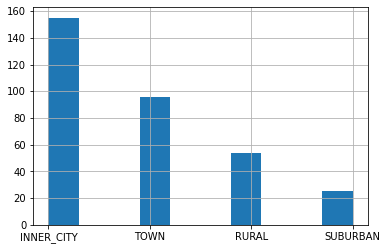

In [ ]:
df["region"].hist(bins=10)

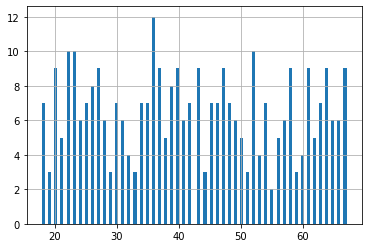

In [ ]:
df["age"].hist(bins=100)

**Sharpiro Test**

to test individaul columns

In [ ]:
import scipy.stats as st
print("Sharpiro : ",st.shapiro(df["age"]))
#Since p value is less than alpha (5%) the distibution does not follow normality.
#p>0.05 the dataset is normal(cannot reject H0)
#p<0.05 the dataset is not normal(can reject H0)

# h0 - > age is normal
# h1 - > age is not normal

# as pvalue 6.6e-09<0.05 
# i.e pvalue < 0.05 then reject H0
# conclusion: - age is not normal

Sharpiro :  ShapiroResult(statistic=0.9519780278205872, pvalue=6.6147682886708026e-09)


In [ ]:
df.groupby('gender').size()

gender
FEMALE    160
MALE      170
dtype: int64

In [ ]:
# independence test

#Stating of Hypothesis :
#H0 : mu_male = mu_female
#H1 : mu_male != mu_female

male = df[df['gender'] == 'MALE']['income']
female = df[df['gender'] == 'FEMALE']['income']
import scipy.stats as st
st.ttest_ind(male,female)

# as p>0.05 reject h0

Ttest_indResult(statistic=-0.2449534813001663, pvalue=0.8066456277315542)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


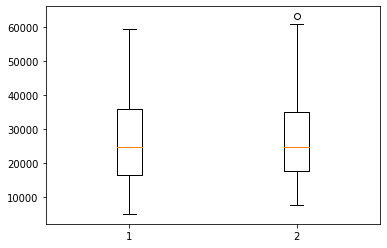

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot([male,female])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


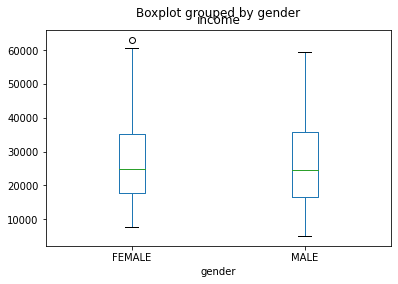

In [ ]:
df.boxplot(by ='gender', column =['income'], grid = False)

In [ ]:
st.ttest_ind(df["income"],df["age"])

# h0 - income is independent on age
# h1 - income dependent on age
#p<0.05
#reject h0 
# income is dependent on age

Ttest_indResult(statistic=37.83413254443953, pvalue=3.035491870002726e-167)

**F-test one way**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


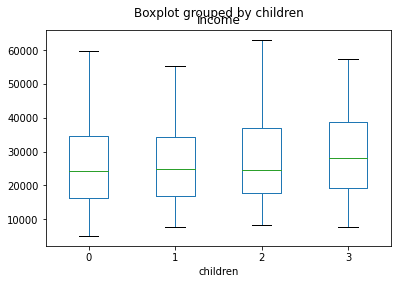

In [ ]:
df.boxplot(by ='children', column =['income'], grid = False)

In [ ]:
# numerical to numerical

print(df.children.unique())
c0 = df[df['children'] == 0]['income']
c1 = df[df['children'] == 1]['income']
c2 = df[df['children'] == 2]['income']
c3 = df[df['children'] == 3]['income']
st.f_oneway(c0,c1,c2,c3)

# h0 - > no.of children is not dependent on income
# h1 - > no.of children dependent on income
#p>0.05
#0.637>0.05
# failed to reject h0
# conclusion -> no.of children doesnot depend on income.

[1 3 0 2]


F_onewayResult(statistic=0.5667851690722862, pvalue=0.6372599526845)

In [ ]:
# categorical date to numerical

# income depends on car or not
# h0 --> income independent on car
# h1 --> income dependent on car
# p<0.5 reject h0 --> income dependent on car
# p>0.5 failed to reject h0 --> income doesnt have any influence for the person to buy car or not

pwc=df[df["car"]=="YES"]["income"]
pwoc=df[df["car"]=="NO"]["income"]

st.f_oneway(pwc,pwoc)

F_onewayResult(statistic=3.2896081108227047, pvalue=0.07063337879141182)

**chi-square test**

In [ ]:
tab = pd.crosstab(df['mortgage'],df['pl'])
tab1 = tab.T
tab1

mortgage,NO,YES
pl,,
NO,121,61
YES,102,46


In [ ]:
st.chi2_contingency(tab1)

# 0.620 is the p value

(0.12378134004427904,
 0.7249689654993441,
 1,
 array([[122.98787879,  59.01212121],
        [100.01212121,  47.98787879]]))

In [ ]:
tab = pd.crosstab(df["region"],df['pl'])
tab1 = tab.T
tab1

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pl,,,,
NO,85,26,14,57
YES,70,28,11,39


In [ ]:
st.chi2_contingency(tab1)

(1.776514811293037,
 0.6200588623676881,
 3,
 array([[85.48484848, 29.78181818, 13.78787879, 52.94545455],
        [69.51515152, 24.21818182, 11.21212121, 43.05454545]]))

In [ ]:
tab = pd.crosstab(df["region"],df['car'])
tab1 = tab.T
tab1

region,INNER_CITY,RURAL,SUBURBAN,TOWN
car,,,,
NO,84,26,14,50
YES,71,28,11,46


In [ ]:
st.chi2_contingency(tab1)

# p>0.05
# 0.87>0.05
# failed to reject h0
# region does not depend on person to buy car

(0.7113615872653685,
 0.8705283912361313,
 3,
 array([[81.72727273, 28.47272727, 13.18181818, 50.61818182],
        [73.27272727, 25.52727273, 11.81818182, 45.38181818]]))

**Titanic Data Set**

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/titanic_train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# dropping the unwanted columns

df.drop(columns=["Name","Ticket","Cabin","PassengerId"],inplace=True)

In [ ]:
# check no.of null values

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# filling NaN values
# ffill - forward fill
# bfill - backward fill

# df["Age"].fillna(df["Age"].mean())

df["Age"].fillna(method="ffill",inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
# drop 2 rows from embarked

df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


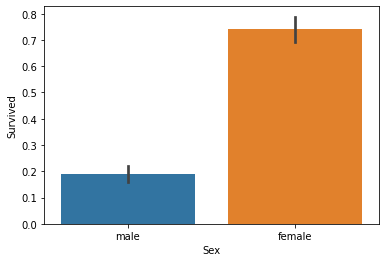

In [ ]:
import seaborn as sns
sns.barplot(x="Sex",y="Survived",data=df)

**cross tab**

In [ ]:
tab = pd.crosstab(df["Sex"],df['Survived'])
tab1 = tab.T
tab1

Sex,female,male
Survived,,
0,81,468
1,231,109


**sci-square test**

In [ ]:
import scipy.stats as st
st.chi2_contingency(tab)

(258.4266104463763,
 3.7799096665576e-58,
 1,
 array([[192.67491564, 119.32508436],
        [356.32508436, 220.67491564]]))

In [ ]:
df.groupby("Embarked")['Fare'].mean()

# c spends more

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

['S' 'C' 'Q']


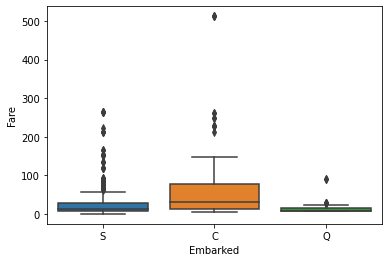

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [ ]:
print(df.Embarked.unique())
s = df[df['Embarked'] == 'S']['Fare']        # c0 = 0 children
c = df[df['Embarked'] == 'C']['Fare']
q = df[df['Embarked'] == 'Q']['Fare']
 
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Embarked',y="Fare",data=df)
plt.show()

df.groupby("Embarked")['Fare'].mean()
# c spends more

In [ ]:
#sns.barplot(x='Embarked', y='Pclass', data=df, ci=None)
tab = pd.crosstab(df['Embarked'],df['Pclass'])
tab = tab.T
print(tab)
st.chi2_contingency(tab)


Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


(123.75190952951289,
 8.435267819894384e-26,
 4,
 array([[ 40.44094488,  18.53543307, 155.02362205],
        [ 34.77165354,  15.93700787, 133.29133858],
        [ 92.78740157,  42.52755906, 355.68503937]]))